## Introduction to Homework

Total Marks 100 points

Extra Credit 30 points


In this homework, you will create machine learning models using K Nearest Neighbor, Decision Tree and Random Forests for Fashion MNIST dataset. Specific instruction for that part of the problem can be found in the corresponding cells above the code. 

Note, you only know the labels of the training dataset. The labels of the test dataset are hidden from you. You will perfrom model selection with cross-validation on the training set.  

After obtaining parameters, use the code given to generate submissions, and upload you submissions to Kaggle. Kaggle score tells you, the performance of your model with respect to the test dataset. You can try and fine tune your parameters to be in the top 20 percent of the submissions for extra credit of 20 points. 

How to participate in the kaggle Competition:

1. Create an account on Kaggle.com
2. Use the link https://www.kaggle.com/c/ece597-697/ to join the competition. Please ensure that you only join using one account. At the top of the jupyter notebook, pdf(s) mention the name you have used for submission. 
3. Replace the classifier "xgb_clf" with the corresponding classifier for your submission(KNN or Decision Tree or Random Forest) and generate submission.csv
4. Upload the submission.csv to see your score on the leaderboard
5. To gain extra credit points, try to score higher on the leaderboard


Bonous Tips:

1. You can directly run this notebook on Google colab if your machine is slower. Upload the data and get started!

2. Go through the documentation of sklearn carefully.

3. Don't try to run the code for all 60,000 data points. Rather first try to verify implementation using 10,000 data points, scale it up to 60,000. If you don't do this, you'll spend lot more time debugging between each iteration. Make the code work first. 

4. Complete all the classifiers before trying to optimize based on the leaderboard.

5. For cross-validation, you can use gridsearchcv

6. Start early! It will give you more time to improve your kaggle leaderboard

Good Luck!

x_train shape:  (60000, 784)
y_train shape : (60000,)
x_test shape:  (10000, 784)


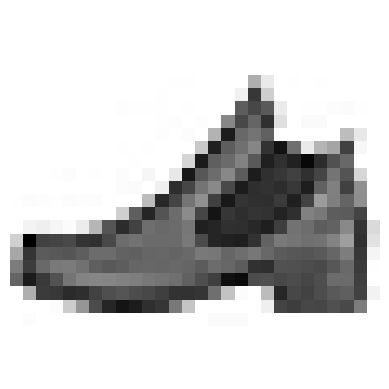

9


In [1]:
## Code to load data from train and test csv(s)

import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt



train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

X_train = train.iloc[:,2:].to_numpy()
y_train = train.iloc[:,:1].to_numpy()

m,n = y_train.shape

y_train = y_train.reshape(m)

X_test = test.iloc[:,1:].to_numpy()


def showImage(data):
    some_article = data
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()



print('x_train shape: ', X_train.shape)
print('y_train shape :', y_train.shape)

print('x_test shape: ', X_test.shape)
# print('y_test shape :', y_test.shape)

showImage(X_train[1])
print(y_train[1])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

##KNN Classifier

(20 points)Implement a KNN classifier with 5-fold cross validation. What is the best value of n that you obtained? What happens if you increase value of n more than your best value? Use {3, 5, 7, 9, 11} values for n. 

No need to submit KNN predictions on Kaggle.

(5 points) What is the time complexity of the k-NN algorithm with naive search approach? How can you improve upon the naive search to reduce the time complexity? 


The time complexity of k-NN is O(m * n), where m is the number of feature and n is the number of examples. To improve this, you could reduce dimenstionality, which would decrease the number of features and help improve the speed of the algorithm. Using decision trees could also help organize the example and make the search more efficent.


In [5]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

X = X_train
y = y_train

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the values of n for KNN
n_values = [3, 5, 7, 9, 11]

best_accuracy = 0
best_n = None

for n in n_values:
    knn = KNeighborsClassifier(n_neighbors=n)
    crossval = KFold(n_splits=5, shuffle=True, random_state=32) 
    scores = cross_val_score(knn, X, y, cv=crossval, scoring='accuracy')
    avg_accuracy = np.mean(scores)

    print(f"n={n}, Average Accuracy: {avg_accuracy}")

    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_n = n

print(f"\nBest value of n: {best_n}, Best Average Accuracy: {best_accuracy}")

n=3, Average Accuracy: 0.8536666666666667
n=5, Average Accuracy: 0.8553333333333333
n=7, Average Accuracy: 0.8546333333333334
n=9, Average Accuracy: 0.8535
n=11, Average Accuracy: 0.8515333333333335

Best value of n: 5, Best Average Accuracy: 0.8553333333333333


## Decision Tree Classifier 1

(10 points) Train five different decision trees. Use the following max depths (10, 11, 12, 13, 14) How does the maximum depth of the tree affect the estimated accuracy? Explain in at most 4 sentences. Choose the model with lowest estimated out of sample error, train it with the full training set, and predict the labels for the images in the test set using Kagglization code given at the end of the notebook. Upload your predictions to Kaggle and report the
accuracy on the public leaderboard by pasting a screenshot in your code.pdf. Is the predicted accuracy close to that of the test set? Make sure that your report clearly states which model was chosen and why.

(5 points) What does default value ccp_alpha=0.0 signify for the decision tree classifier?

1) The higher the maximum depth of the tree, the more complex the tree is, increasing accuracy in some cases. If a tree is too deep, this may lead to overfitting, which will decrease the effectiveness of the model.

2) This means that no pruning is done, which is meant to help limit overfitting.


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train five different decision trees with different maximum depths
max_depths = [10, 11, 12, 13, 14]
DTs = []

for depth in max_depths:
    DT = DecisionTreeClassifier(max_depth=depth)
    DT.fit(X_train, y_train)
    DTs.append(DT)

# Evaluate the accuracy of each model on the training data
train_accuracies = []
for DT in DTs:
    y_train_pred = DT.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    print(f"Max Depth: {DT.max_depth}, Training Accuracy: {train_accuracy}")

Max Depth: 10, Training Accuracy: 0.8479666666666666
Max Depth: 11, Training Accuracy: 0.8679666666666667
Max Depth: 12, Training Accuracy: 0.8866666666666667
Max Depth: 13, Training Accuracy: 0.90565
Max Depth: 14, Training Accuracy: 0.9266666666666666


In [29]:
DT1 = DecisionTreeClassifier(max_depth=16)
DT1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=16)

## Decision Tree Classifier 2

(10 points) Train five different decision trees using five-fold cross validation. Use the following values for max depth (10, 13, 16, 19). Keep all the other parameters to default value. How does the maximum depth of the tree affect the estimated accuracy? Explain in at most 4 sentences. Choose the model with lowest estimated out of sample error, train it with the full training set, and predict the labels for the images in the test set. Finally using Kagglization code given at the end of the notebook generate predictions. Upload your predictions to Kaggle as well as report the position on the public leaderboard by pasting a screenshot in your code.pdf. Is the accuracy obtained on training set, close to that of the test set(kaggle leaderboard)? Make sure that your report clearly states which max depth was chosen and why.

(10 points) Compare the best tree obtained for max-depth, with the best tree classifier obtained for ccp_alpha. Is there a difference in their errors? Why?

1) The higher the maximum depth of the tree, the more complex the tree is, increasing accuracy in some cases. If a tree is too deep, this may lead to overfitting, which will decrease the effectiveness of the model.

2) The best tree classifier obtained for ccp_alpha has a higher error rate than the best tree obtained for max-depth. This is because ccp_alpha is meant to combat overfitting, which makes it a better model for the test set, but a worse model for the training data.



In [28]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Define the values of depth for decision trees
depth = 16

#Define the values of ccp_alpha
ccp_alphas = [0.0001,0.001,0.01,0.1]
# Perform five-fold cross-validation for each value of max depth
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(max_depth=depth,ccp_alpha = ccp_alpha)
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    avg_accuracy = np.mean(scores)
    print(f"Max Depth: {depth}, ccp_alpha : {ccp_alpha}, Average Accuracy: {avg_accuracy}")

Max Depth: 16, ccp_alpha : 0.0001, Average Accuracy: 0.8181833333333334
Max Depth: 16, ccp_alpha : 0.001, Average Accuracy: 0.7758166666666667
Max Depth: 16, ccp_alpha : 0.01, Average Accuracy: 0.6928666666666666
Max Depth: 16, ccp_alpha : 0.1, Average Accuracy: 0.1


In [30]:
DT2 = DecisionTreeClassifier(max_depth=16, ccp_alpha=0.001)
DT2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=16)

## Random Forest Classifier 

(20 points) Create a random forest with 150 estimators and using out of bag classification score set to True. 

Create another random forest with 150 estimators without using out of bag score and bootstrap. Cross validate over 'max_features' with values [10,28,50]. 

Use the best random forest out of all the forests you created to predict labels in test.csv. Generate predictions using the kagglization code given at the end of the notebook. Upload your predictions obtained to Kaggle and report the accuracy on the public leaderboard by pasting a screenshot in the code.pdf. Is the predicted accuracy close to that of the test set? Make sure that your report clearly states which model was chosen and why?

(5 points) Compare the output of both the forests.

In [9]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Random Forest with Out-of-Bag 
rf_oob = RandomForestClassifier(n_estimators=150, oob_score=True)
rf_with_oob = rf_oob.fit(X_train, y_train)

# Random Forest without Out-of-Bag
rf_no_oob = RandomForestClassifier(n_estimators=150, oob_score=False, bootstrap=False)
rf_with_no_oob = rf_no_oob.fit(X_train, y_train)

# Cross-validation over max_features for Random Forests
max_features_values = [10, 28, 50]
rfs = [rf_with_oob, rf_with_no_oob]
best_accuracy = 0
best_rf = None

for max_features in max_features_values:
    for rf in rfs:
        scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
        avg_accuracy = np.mean(scores)

        print(f"Max Features: {max_features}, Average Accuracy: {avg_accuracy}")

        if avg_accuracy > best_accuracy:
            best_accuracy = avg_accuracy
            best_rf = rf

Max Features: 10, Average Accuracy: 0.8824166666666666
Max Features: 10, Average Accuracy: 0.8876833333333334
Max Features: 28, Average Accuracy: 0.8821999999999999
Max Features: 28, Average Accuracy: 0.8874333333333334
Max Features: 50, Average Accuracy: 0.8821666666666668
Max Features: 50, Average Accuracy: 0.8877333333333335




(15 points) Can you visualize the most important Random Forest Classifier features?  (Hint: Obtain feature importances and visualize them by reshaping the data)


## Extra credit

(10 points) Can you sort and remove features that insignificant, to improve the testing time? Show this using code that removing certain features doesn't drastically change the error, but improves speed of testing. 

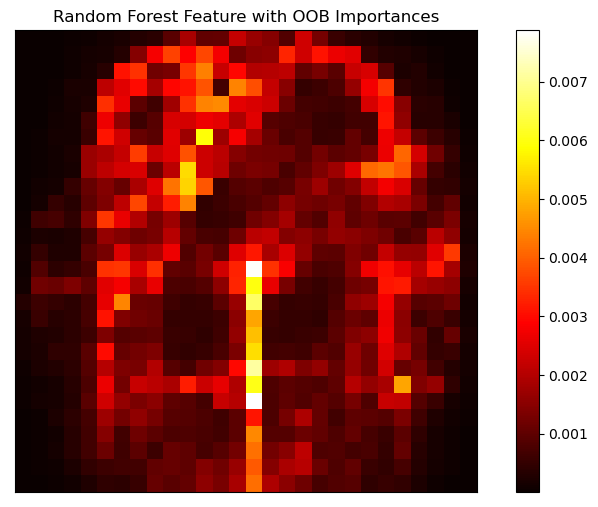

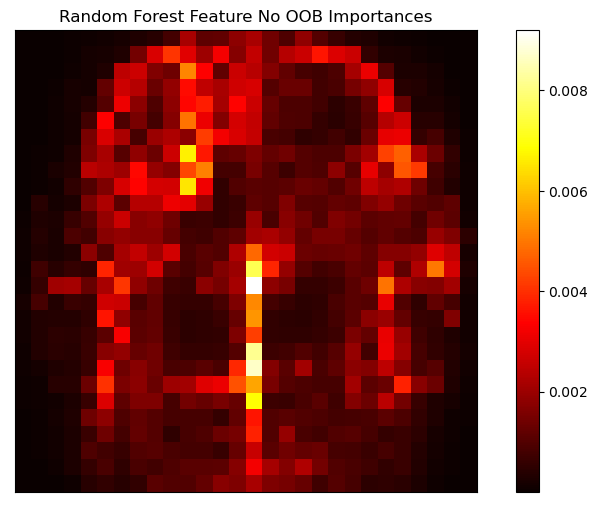

In [12]:
# Obtain feature importances
feature_importances_oob = rf_with_oob.feature_importances_
feature_importances_no_oob = rf_with_no_oob.feature_importances_

# Reshape the feature importances for visualization
feature_importances_oob = feature_importances_oob.reshape(28, 28)
feature_importances_no_oob = feature_importances_no_oob.reshape(28, 28)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.imshow(feature_importances_oob, cmap='hot', interpolation='nearest')
plt.title("Random Forest Feature with OOB Importances")
plt.colorbar()
plt.show()

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.imshow(feature_importances_no_oob, cmap='hot', interpolation='nearest')
plt.title("Random Forest Feature No OOB Importances")
plt.colorbar()
plt.show()

## Kagglization code 

use this code to generate prediction.csv for you classifier. Upload the predictions to the kaggle competition. Replace xgb_clf by corresponding classifier to obtain your prediction.csv



In [33]:
## code to generate predictions

import csv

predictions = np.zeros(10000,)
for i in range(0,10000):
    predictions[i] = int((DT2.predict(X_test[i].reshape(1, -1)))) ## make change in this line for each classifier upload output from Decision Tree and random forest on Kaggle!

# pd
prediction = pd.DataFrame(predictions, columns=['label']).astype(int).to_csv('predictionDT2.csv')

format_read=pd.read_csv("predictionDT2.csv")
format_read.columns = ["id","label"]
format_read.to_csv("predictionDT2.csv",index=False)